# Regresión lineal
## Leandro León
### Se aplicará la regresión lineal a un dataset de articulos que han sido consultados, comentados, compratidos etc.

In [24]:

# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("articulos_ml.csv")  # Se carga el dataset
#veamos cuantas dimensiones y registros contiene
data.shape

(161, 8)

In [3]:
# Visualiza el dataset
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


#### Se filtra el dataset de manera que nos quedemos con los artículos con menos de 4000 palabras y 40000 compraticiones

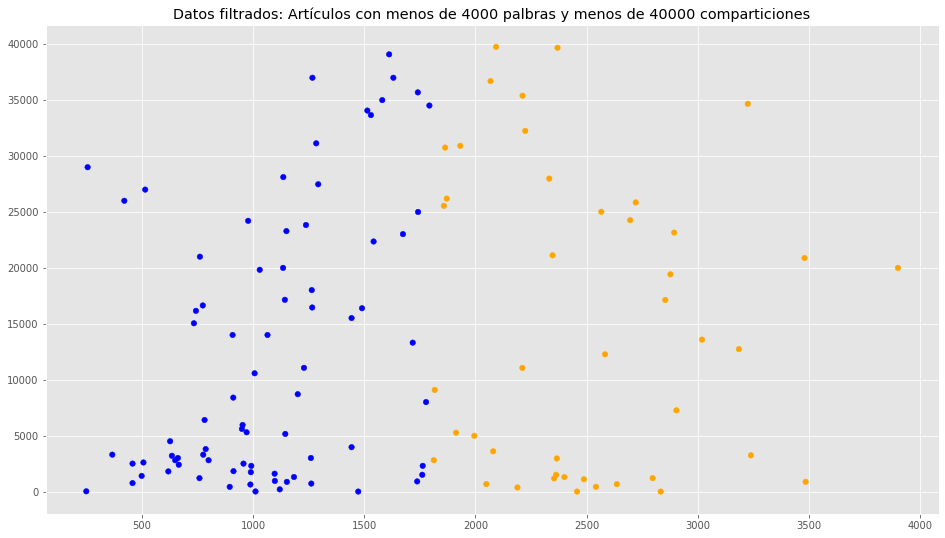

In [64]:
filtered_data = data[(data['Word count'] <= 4000) & (data['# Shares'] <= 40000)]
 
colores=['orange','blue']
tamanios=[30,60]
 
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.title('Datos filtrados: Artículos con menos de 4000 palbras y menos de 40000 comparticiones')
plt.show()

In [65]:
# Ahora veamos algunas estadísticas de nuestros datos
#TIMAMOS DESDE LA COLUMNA 2 A LA 3 debido a que estas columnas tienen valores aptos para el entrenamiento
X = data.iloc[:, 2:3].values
y = data.iloc[:, -1].values


## Dividimos los datos para el entrenamiento y testeo

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
regression = LinearRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

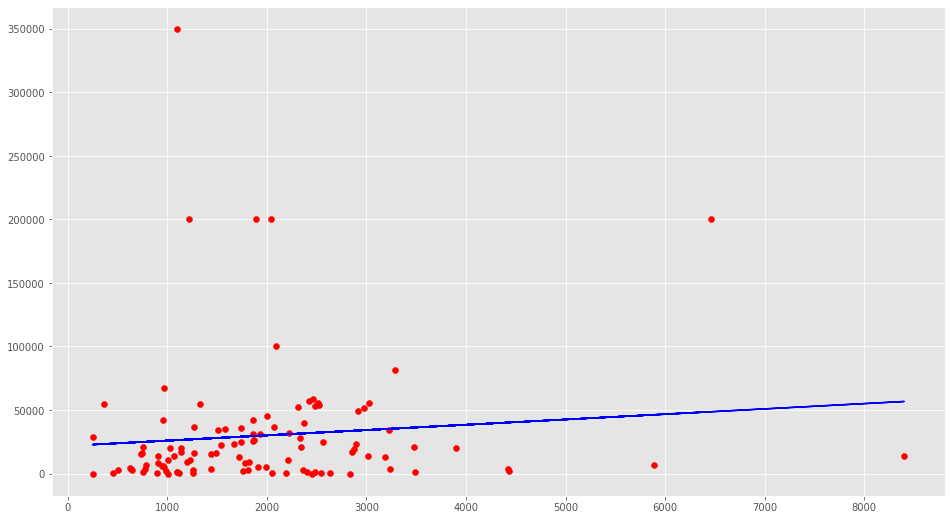

In [68]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regression.predict(X_train), color = "blue")
plt.show()

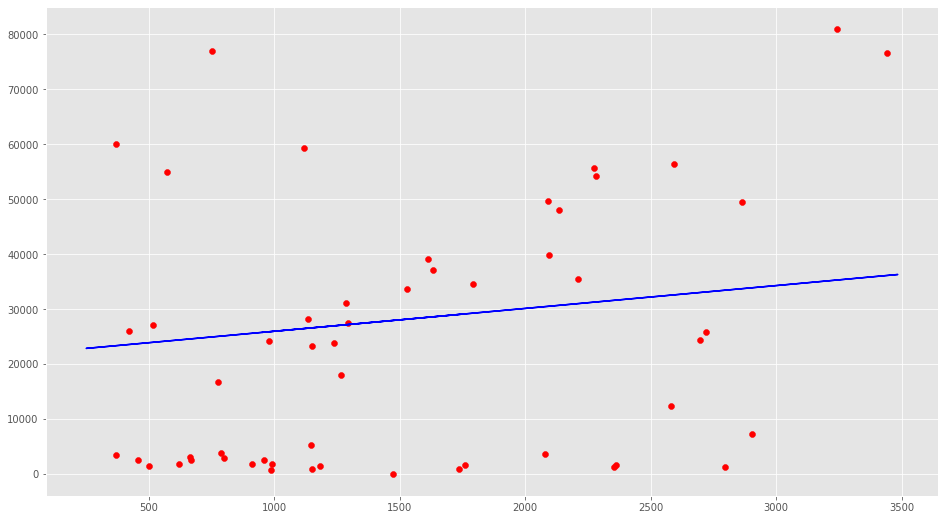

In [73]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, regression.predict(X_train), color = "blue")
plt.show()

Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


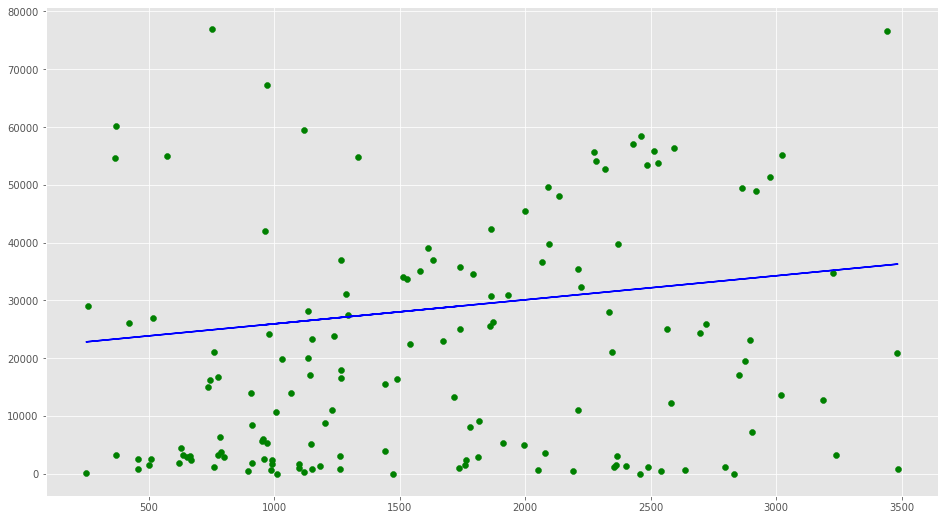

In [72]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regression.predict(X_train), color = "blue")

In [14]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595
